In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

In [105]:
df = pd.read_csv(r"../data/final/final_dataset.csv")
df.insert(0, 'status_inf', df.pop('status_inf'))

df = df.drop(columns=['conglome', 'vivienda','hogar','codperso','periodo','ocupinf_t1','ocupinf_t2','periodo'])

In [106]:
df

,status_inf,sexo,edad,estadocivil,tuvotrabajo,categoria_trabajador,trabajopara,registrosunat,cuentassunat,tipocontrato,...,electricidad,celular,internet,personas_ingresos,personas_hogar,pobreza,tiempotrabajo,alquiler,horastotales_sempasada,ingtrabw
0,0,2,47,2,1,3,2,99,99,1.0,...,1.0,1,0,2,5,3,12.000000,500,40,15491.0
1,1,1,57,1,1,2,99,2,1,99.0,...,1.0,1,0,3,5,3,38.000000,80,48,28505.0
2,0,1,29,6,1,3,2,99,99,1.0,...,1.0,1,0,4,5,3,4.250000,200,16,35810.0
3,0,1,26,6,1,3,2,99,99,2.0,...,1.0,1,0,4,5,3,0.416667,200,25,10779.0
4,0,1,67,2,1,2,99,2,2,99.0,...,1.0,1,0,3,4,3,40.000000,1000,58,23592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20033,1,1,61,2,1,2,99,2,2,99.0,...,1.0,1,1,4,7,3,17.000000,1000,60,24033.0
20034,0,1,56,2,1,4,6,1,1,1.0,...,1.0,1,1,4,6,3,30.000000,1000,48,73477.0
20035,0,1,29,6,1,3,2,99,99,2.0,...,1.0,1,1,4,6,3,2.000000,1000,42,42659.0
20036,0,1,31,2,1,4,5,1,1,2.0,...,1.0,1,0,2,6,3,0.250000,18,52,19657.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20038 entries, 0 to 20037
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status_inf               20038 non-null  int64  
 1   sexo                     20038 non-null  int64  
 2   edad                     20038 non-null  int64  
 3   estadocivil              20038 non-null  int64  
 4   tuvotrabajo              20038 non-null  int64  
 5   categoria_trabajador     20038 non-null  int64  
 6   trabajopara              20038 non-null  int64  
 7   registrosunat            20038 non-null  int64  
 8   cuentassunat             20038 non-null  int64  
 9   tipocontrato             20037 non-null  float64
 10  numpersonastrabajo       20038 non-null  int64  
 11  tuvootrotrabajo          20038 non-null  int64  
 12  normtrabaja              20038 non-null  int64  
 13  horas_normtrabaja        20038 non-null  int64  
 14  disponiblehorastrabaja

In [108]:
df['status_inf'].value_counts()

status_inf
0    16590
1     3448
Name: count, dtype: int64

In [109]:
print(df.shape[1])

55


In [110]:
df_indep = df.drop(columns = ['status_inf'])

In [111]:
categoricas = ['sexo','estadocivil','tuvotrabajo','categoria_trabajador','trabajopara','registrosunat',
               'cuentassunat','tipocontrato','numpersonastrabajo','tuvootrotrabajo','normtrabaja',
               'disponiblehorastrabajar','deseaotrotrabajo','antepasadosconsidera','perteneceindig',
               'lenguamaterna','niveleduc','asiste_educ','usointernet','viviadistrito','padece_enfer',
               'sintoma_malestar','enfermedad','recaida','accidente','notuvoenf','essalud','seguroprivado',
               'eps','seguroffaa','sis','tipovivienda','materialparedes','materialpisos','materialtechos',
               'vivienda_status','viviendatitulo','agua_procedencia','agua_potable','conexionsshh','electricidad',
               'celular','internet','pobreza']

print ("Total inicial de columnas es 55")
df_categoricas = df_indep[categoricas]
df_continuas = df_indep.drop(columns=categoricas)

print(df_categoricas.shape[1])
print(df_continuas.shape[1])


Total inicial de columnas es 55
44
10


In [112]:
df_encoded = pd.get_dummies(df_categoricas, columns=categoricas, drop_first=True, dummy_na=False)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20038 entries, 0 to 20037
Columns: 131 entries, sexo_2 to pobreza_3
dtypes: bool(131)
memory usage: 2.5 MB


In [113]:
df_indep_final = pd.concat([df_encoded, df_continuas], axis=1)
df_indep_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20038 entries, 0 to 20037
Columns: 141 entries, sexo_2 to ingtrabw
dtypes: bool(131), float64(4), int64(6)
memory usage: 4.0 MB


In [114]:
df_indep_final

,sexo_2,estadocivil_2,estadocivil_3,estadocivil_4,estadocivil_5,estadocivil_6,tuvotrabajo_2,categoria_trabajador_2,categoria_trabajador_3,categoria_trabajador_4,...,edad,horas_normtrabaja,habitaciones,habitacionesdormir,personas_ingresos,personas_hogar,tiempotrabajo,alquiler,horastotales_sempasada,ingtrabw
0,True,True,False,False,False,False,False,False,True,False,...,47,40,5.0,3.0,2,5,12.000000,500,40,15491.0
1,False,False,False,False,False,False,False,True,False,False,...,57,48,1.0,0.0,3,5,38.000000,80,48,28505.0
2,False,False,False,False,False,True,False,False,True,False,...,29,40,4.0,3.0,4,5,4.250000,200,16,35810.0
3,False,False,False,False,False,True,False,False,True,False,...,26,25,4.0,3.0,4,5,0.416667,200,25,10779.0
4,False,True,False,False,False,False,False,True,False,False,...,67,58,6.0,3.0,3,4,40.000000,1000,58,23592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20033,False,True,False,False,False,False,False,True,False,False,...,61,60,6.0,5.0,4,7,17.000000,1000,60,24033.0
20034,False,True,False,False,False,False,False,False,False,True,...,56,48,7.0,6.0,4,6,30.000000,1000,48,73477.0
20035,False,False,False,False,False,True,False,False,True,False,...,29,42,7.0,6.0,4,6,2.000000,1000,42,42659.0
20036,False,True,False,False,False,False,False,False,False,True,...,31,52,3.0,1.0,2,6,0.250000,18,52,19657.0


In [115]:
# Filtrar variables con un gran número de faltantes
null_percent = df_indep_final.isnull().mean()*100
cols_null = null_percent[null_percent > 80 ].index
cols_validas = null_percent[null_percent <= 80 ].index
print(cols_null)
# df_null = df[cols_validas].copy()
# df_null.shape[1]

Index([], dtype='object')


In [116]:
# Para eliminar las variables con muy poca varianza (definido por el umbral)
varianzas = df_indep_final.var()
umbral = 0.01
vars_seleccionadas = varianzas[varianzas > umbral].index
vars_no_seleccionadas = varianzas[varianzas <= umbral].index

print(df_indep_final[vars_no_seleccionadas].nunique())
## print(df_indep_final[vars_seleccionadas].nunique())

df_indep_final=df_indep_final[vars_seleccionadas]

categoria_trabajador_6    2
trabajopara_3             2
registrosunat_3           2
tipocontrato_3.0          2
tipocontrato_4.0          2
tipocontrato_5.0          2
lenguamaterna_3.0         2
lenguamaterna_6.0         2
lenguamaterna_7.0         2
lenguamaterna_8.0         2
tipovivienda_5.0          2
tipovivienda_6.0          2
tipovivienda_7.0          2
materialparedes_2.0       2
materialparedes_6.0       2
materialparedes_8.0       2
materialpisos_7.0         2
materialtechos_6.0        2
materialtechos_7.0        2
materialtechos_8.0        2
vivienda_status_5         2
vivienda_status_7         2
agua_procedencia_3        2
agua_procedencia_6        2
electricidad_3.0          2
dtype: int64


In [119]:
df_indep_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20038 entries, 0 to 20037
Columns: 116 entries, sexo_2 to ingtrabw
dtypes: bool(106), float64(4), int64(6)
memory usage: 3.6 MB


In [120]:

# 1. Calculamos la matriz de correlación
corr_matrix = df_indep_final.corr()

# 2. Pasamos a formato tabla (pares de variables con su correlación)
high_corr = corr_matrix.stack().reset_index()
high_corr.columns = ['Variable1', 'Variable2', 'Correlacion']

# 3. Quitamos duplicados y autocorrelaciones (correlación = 1)
high_corr = high_corr[high_corr['Variable1'] < high_corr['Variable2']]

# 4. Filtramos correlaciones mayores a 0.70 en valor absoluto
resultados = high_corr[high_corr['Correlacion'].abs() > 0.70]

# 5. Ordenamos de mayor a menor correlación
resultados = resultados.sort_values(by="Correlacion", ascending=False).reset_index(drop=True)

print(resultados)


                 Variable1               Variable2  Correlacion
0          cuentassunat_99        registrosunat_99     1.000000
1        tipocontrato_99.0          trabajopara_99     0.989080
2         registrosunat_99           trabajopara_2     0.926198
3          cuentassunat_99           trabajopara_2     0.926198
4       agua_procedencia_2        tipovivienda_4.0     0.884067
5       agua_procedencia_2          conexionsshh_2     0.862678
6             habitaciones      habitacionesdormir     0.832815
7           conexionsshh_2        tipovivienda_4.0     0.832248
8          registrosunat_2       tipocontrato_99.0     0.821425
9        horas_normtrabaja  horastotales_sempasada     0.814350
10         registrosunat_2          trabajopara_99     0.811314
11  categoria_trabajador_2       tipocontrato_99.0     0.785723
12  categoria_trabajador_2          trabajopara_99     0.777143
13       vivienda_status_6       viviendatitulo_99     0.736804
14          cuentassunat_2         regis

In [121]:
# 1. Calculamos la matriz de correlación en valor absoluto
corr_matrix = df_indep_final.corr().abs()

# 2. Seleccionamos la parte superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Identificamos las columnas con correlación mayor a 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

print("Variables a eliminar por alta correlación (>0.70):")
print(to_drop)

# 4. Creamos un nuevo dataset sin esas columnas
df_indep_final = df_indep_final.drop(columns=to_drop)

print("Nuevo shape del DataFrame:", df_indep_final.shape)

Variables a eliminar por alta correlación (>0.70):
['trabajopara_99', 'registrosunat_2', 'registrosunat_99', 'cuentassunat_2', 'cuentassunat_99', 'tipocontrato_99.0', 'numpersonastrabajo_5', 'seguroffaa_2', 'viviendatitulo_99', 'agua_procedencia_2', 'conexionsshh_2', 'pobreza_3', 'habitacionesdormir', 'horastotales_sempasada']
Nuevo shape del DataFrame: (20038, 102)


In [122]:
df_model = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20038 entries, 0 to 20037
Columns: 103 entries, status_inf to ingtrabw
dtypes: bool(94), float64(3), int64(6)
memory usage: 3.2 MB


In [123]:
X = df_model.drop(columns=['status_inf'])
y = df_model['status_inf']

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [125]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(scale_pos_weight)

4.812182741116751


In [126]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                      scale_pos_weight = scale_pos_weight)
model.fit(X_train, y_train)



c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:31:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


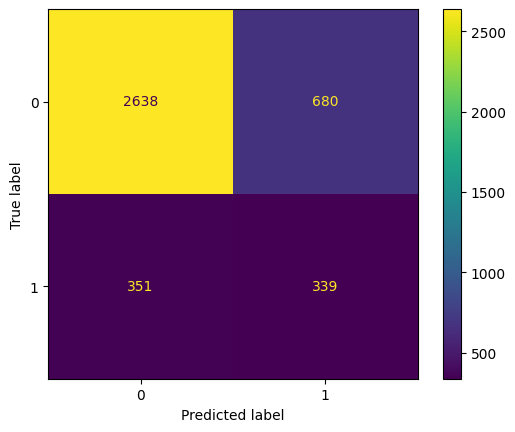

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

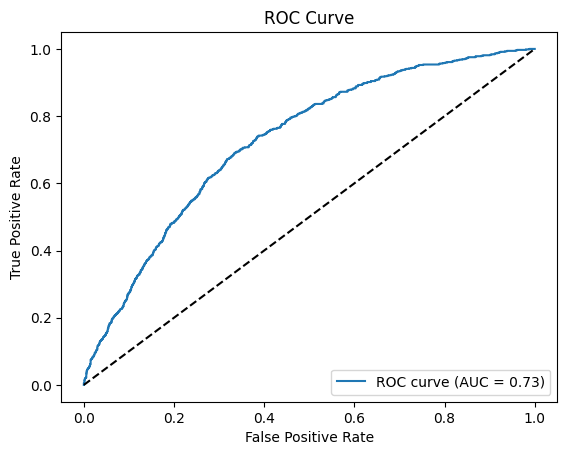

In [128]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

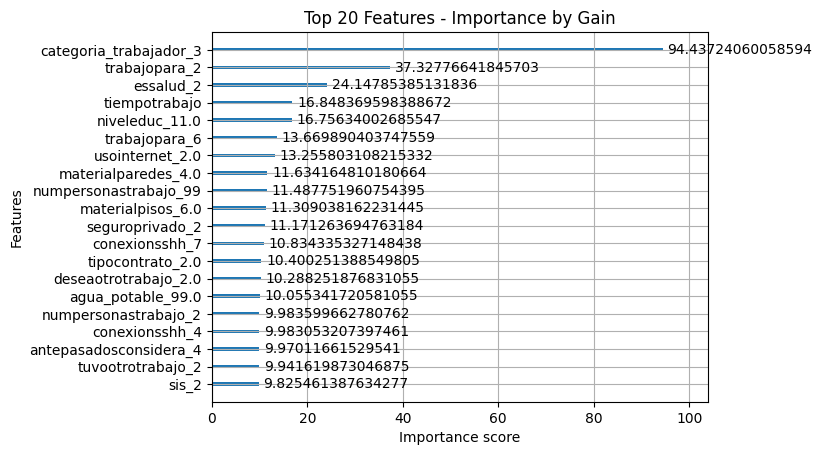

In [129]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Usamos el modelo ya entrenado
plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Features - Importance by Gain")
plt.show()